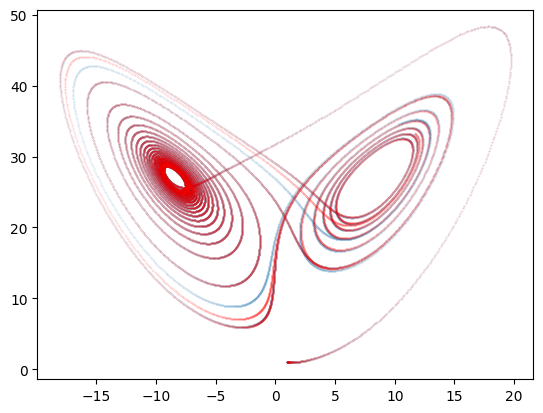

In [14]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from flax import struct


@struct.dataclass
class State:
    x: jax.Array
    y: jax.Array
    z: jax.Array


def next_state(state, dt, sigma=10., rho=28., beta=8. / 3.):
    x_dot = sigma * (state.y - state.x)
    y_dot = state.x * (rho - state.z) - state.y
    z_dot = state.x * state.y - beta * state.z
    return State(
        x=state.x + (x_dot * dt),
        y=state.y + (y_dot * dt),
        z=state.z + (z_dot * dt),
    )


def trajectory(init, dt, steps):

    def step(i, acc):
        state, traj = acc
        state = next_state(state, dt)
        return state, traj.at[i].set(jnp.hstack([state.x, state.y, state.z]))

    positions = jnp.zeros((steps, 3))
    return jax.lax.fori_loop(0, steps, step, (init, positions))[1]


init = State(x=jnp.array([1.]), y=jnp.array([1.]), z=jnp.array([1.]))
positions = trajectory(init, 0.001, 20000)

plt.scatter(positions[:, 0], positions[:, 2], s=0.1, alpha=0.2)

positions2 = trajectory(init.replace(x=jnp.array([1.001])), 0.001, 20000)
plt.scatter(positions2[:, 0], positions2[:, 2], c='r', s=0.1, alpha=0.2)
plt.show()